## The Fashion-MNIST Dataset

For the problems below you will be working with the fashion MNIST dataset. The Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot


**you can read the data (and create train/test) as below:**

In [22]:
import numpy as np
import pandas as pd

In [23]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [24]:
X_train.shape
X_train


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [25]:
X_test.shape

(10000, 28, 28)

In [26]:
y_train.shape

(60000,)

In [27]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

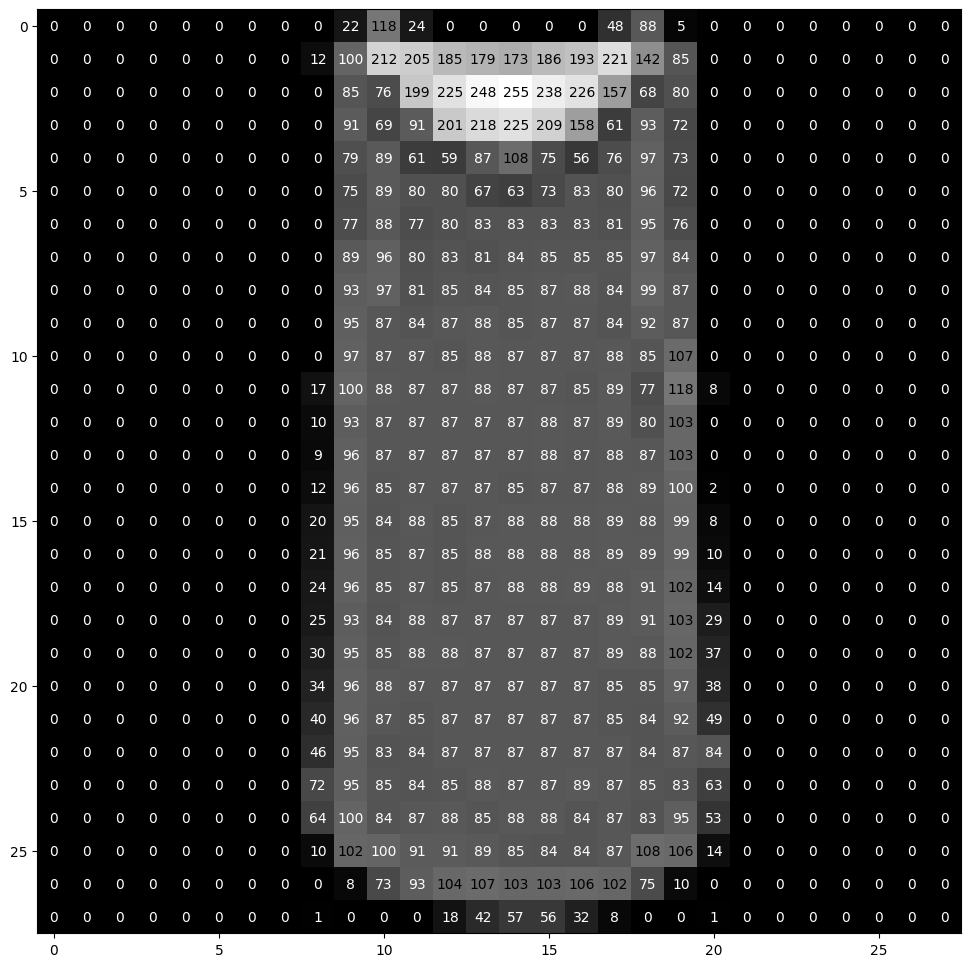

In [28]:
import matplotlib.pyplot as plt

def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[2].reshape(28,28), ax)

## Feature scaling - for standardization

In [29]:
X_train = X_train / 255.0
X_test = X_test / 255.0

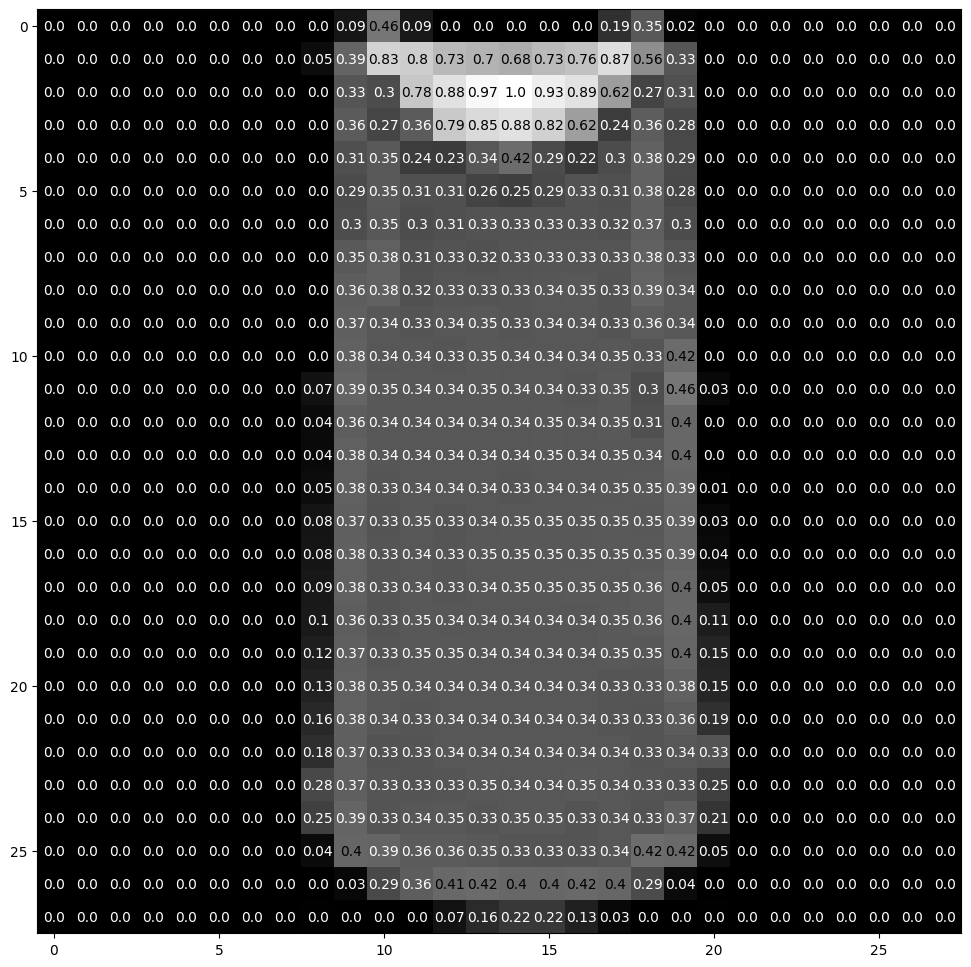

In [30]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[2].reshape(28,28), ax)

## Reshaping the X_train and X_test from 28x28 to 784 variables

In [31]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [32]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


## Training and fitting a MLP (feed-forward achitecture)

In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

nn = Sequential()
nn.add(Input(shape= X_train.shape[1]))
nn.add(Dense(units = 250, activation = "relu"))
nn.add(Dropout(0.1))
nn.add(Dense(units = 100, activation = "relu"))
nn.add(Dropout(0.1))
nn.add(Dense(units = 10, activation = "softmax"))

In [34]:
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 250)               196250    
                                                                 
 dropout_2 (Dropout)         (None, 250)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               25100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 222360 (868.59 KB)
Trainable params: 222360 (868.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
nn.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [36]:
nn.fit(X_train, y_train, batch_size = 100, validation_data=(X_test, y_test), epochs = 30)

Epoch 1/30
600/600 [==============================] - 6s 9ms/step - loss: 0.5414 - accuracy: 0.8074 - val_loss: 0.4636 - val_accuracy: 0.8293
Epoch 2/30
600/600 [==============================] - 6s 11ms/step - loss: 0.3897 - accuracy: 0.8582 - val_loss: 0.3737 - val_accuracy: 0.8618
Epoch 3/30
600/600 [==============================] - 5s 8ms/step - loss: 0.3511 - accuracy: 0.8714 - val_loss: 0.3743 - val_accuracy: 0.8637
Epoch 4/30
600/600 [==============================] - 6s 11ms/step - loss: 0.3275 - accuracy: 0.8792 - val_loss: 0.3557 - val_accuracy: 0.8713
Epoch 5/30
600/600 [==============================] - 5s 9ms/step - loss: 0.3112 - accuracy: 0.8852 - val_loss: 0.3527 - val_accuracy: 0.8734
Epoch 6/30
600/600 [==============================] - 6s 10ms/step - loss: 0.2981 - accuracy: 0.8885 - val_loss: 0.3379 - val_accuracy: 0.8784
Epoch 7/30
600/600 [==============================] - 6s 10ms/step - loss: 0.2858 - accuracy: 0.8935 - val_loss: 0.3468 - val_accuracy: 0.8777
Ep

313/313 [==============================] - 1s 3ms/step


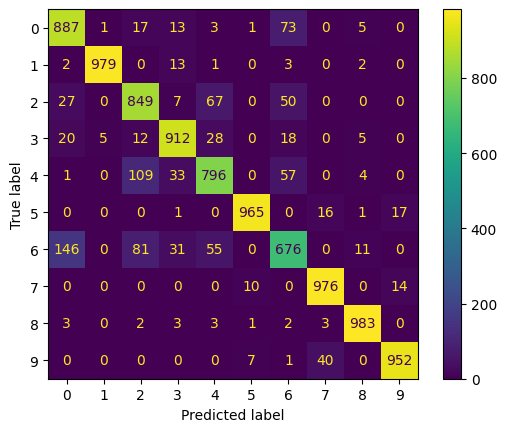

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

ConfusionMatrixDisplay(confusion_matrix(y_test, np.argmax(nn.predict(X_test), axis = 1))).plot();

In [38]:
print(classification_report(y_test, np.argmax(nn.predict(X_test), axis =1)))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.79      0.85      0.82      1000
           3       0.90      0.91      0.91      1000
           4       0.84      0.80      0.82      1000
           5       0.98      0.96      0.97      1000
           6       0.77      0.68      0.72      1000
           7       0.94      0.98      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

